In [1]:
import cv2 
import skimage  
import numpy as np 
from matplotlib import pyplot as plt

def plot(img):
    plt.imshow(img, cmap = "gray")
    plt.plot()
    
    
def show(img):
    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

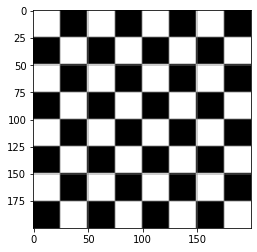

In [2]:
from skimage import data 

image = data.checkerboard()
plot(image)

In [12]:

def postprocesss(image, response_image,min_distance):
    ''' define the min distance bw two key points and refine'''
    
    plot(response_image)
    features_refined = corner_peaks(response_image,min_distance=min_distance )
    print(features_refined.shape)

    ''' subpixel level filtering of points '''

    subpix = corner_subpix(image,features_refined, window_size=13)
    print(subpix.shape)

    ''' plot for visual '''
    plt.figure(figsize= [10,10])

    plt.imshow(image, cmap = plt.cm.gray) # image plot 

    plt.scatter(features_refined[:,1], features_refined[:,0], color = "green", marker = "o",linestyle= "None") # peak corners plot 


    plt.scatter(subpix[:,1],subpix[:,0], marker = "+", color = "red") # subpixel level plot over it 

    plt.show()

### harris corners 

(49, 2)
(49, 2)


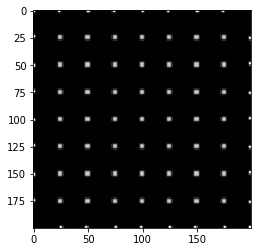

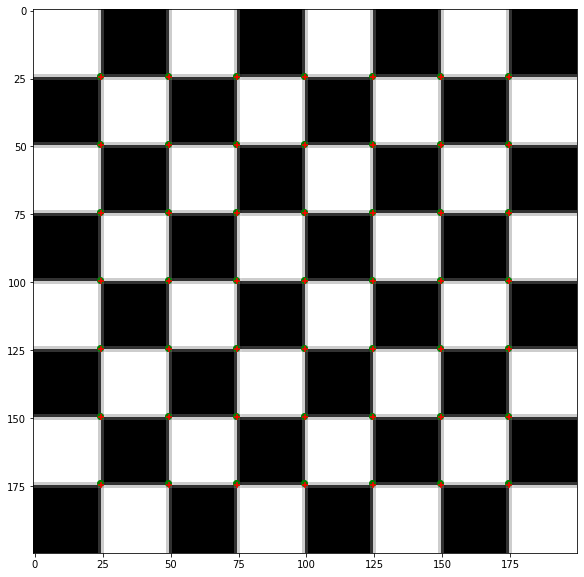

In [14]:
from skimage.feature import corner_harris, corner_peaks, corner_subpix 

'''initial calc'''

harris_feature_response_image = corner_harris(image, k = 0.001)

postprocesss(image, harris_feature_response_image, min_distance= 5)

### fast corners

(49, 2)
(49, 2)


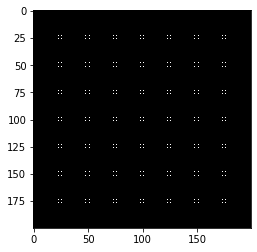

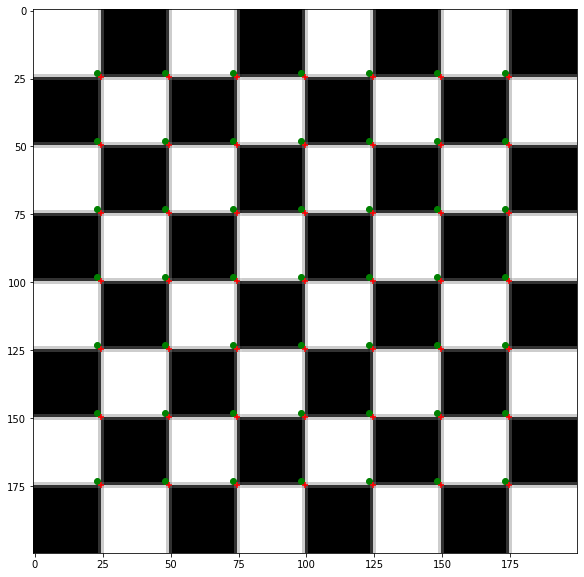

In [13]:
from skimage.feature import corner_fast, corner_peaks, corner_subpix, corner_orientations 
from skimage.morphology import octagon 


fast_c_response_img  = corner_fast(image, n = 11)
postprocesss(image, fast_c_response_img, min_distance= 5)

### shi-thomasi

(49, 2)
(49, 2)


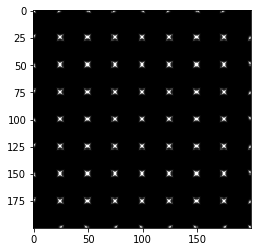

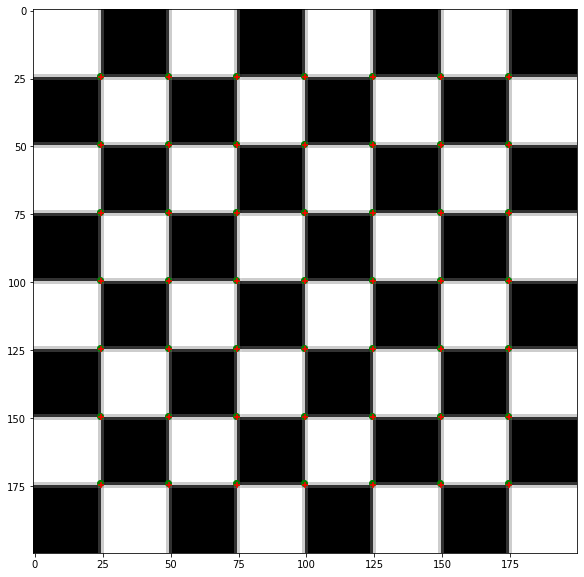

In [15]:
from skimage.feature import corner_shi_tomasi, corner_peaks, corner_subpix 

shi_response_img  = corner_shi_tomasi(image)
postprocesss(image, shi_response_img, min_distance= 5) 

###  skimage tut

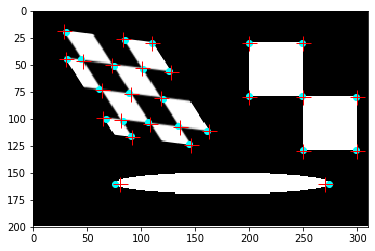

In [6]:
# from skimage.feature import corner_harris, corner_subpix, corner_peaks

# from skimage.transform import warp, AffineTransform
# from skimage.draw import ellipse

# # Sheared checkerboard
# tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
#                         translation=(110, 30))
# image = warp(data.checkerboard()[:90, :90], tform.inverse,
#              output_shape=(200, 310))
# # Ellipse
# rr, cc = ellipse(160, 175, 10, 100)
# image[rr, cc] = 1
# # Two squares
# image[30:80, 200:250] = 1
# image[80:130, 250:300] = 1

# coords = corner_peaks(corner_harris(image), min_distance=5)
# coords_subpix = corner_subpix(image, coords, window_size=13)

# fig, ax = plt.subplots()
# ax.imshow(image, cmap=plt.cm.gray)
# ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
#         linestyle='None', markersize=6)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
# ax.axis((0, 310, 200, 0))
# plt.show()